# Vehicle Insurance Prediction 

In [59]:
import pandas as pd
from hdfs import InsecureClient
import os
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sparkSession = SparkSession.builder.appName("EDA Vehicle Insurance").getOrCreate()
client_hdfs = InsecureClient('hdfs://localhost:9820')

In [5]:
df = sparkSession.read.csv('hdfs://localhost:9820/test/Merge.csv', header=True, inferSchema= True)
df.show()

+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
| id|Gender|Age|Driving_License|Region_Code|Previously_Insured|Vehicle_Age|Vehicle_Damage|Annual_Premium|Policy_Sales_Channel|Vintage|Response|
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
|  1|  Male| 44|              1|         28|                 0|  > 2 Years|           Yes|         40454|                  26|    217|       1|
|  2|  Male| 76|              1|          3|                 0|   1-2 Year|            No|         33536|                  26|    183|       0|
|  3|  Male| 47|              1|         28|                 0|  > 2 Years|           Yes|         38294|                  26|     27|       1|
|  4|  Male| 21|              1|         11|                 1|   < 1 Year|            No|         28619|                 152|    203|  

In [7]:
result_df = df.select("*").toPandas()
result_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [5]:
print(result_df.dtypes)
print(result_df.isnull().any())
print(result_df.isnull().sum())

id                       int32
Gender                  object
Age                      int32
Driving_License          int32
Region_Code              int32
Previously_Insured       int32
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int32
Policy_Sales_Channel     int32
Vintage                  int32
Response                 int32
dtype: object
id                      False
Gender                  False
Age                     False
Driving_License         False
Region_Code             False
Previously_Insured      False
Vehicle_Age             False
Vehicle_Damage          False
Annual_Premium          False
Policy_Sales_Channel    False
Vintage                 False
Response                False
dtype: bool
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_S

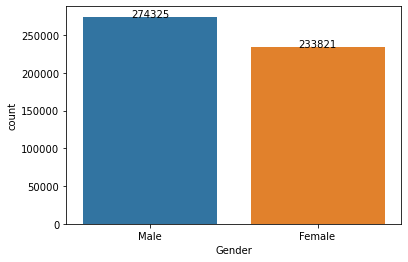

In [6]:
graph = sns.countplot(result_df.Gender)
graph.set_xticklabels(graph.get_xticklabels())
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        result_df['Gender'].value_counts()[i],ha="center")
    i += 1

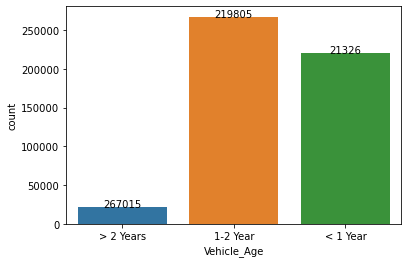

In [7]:
graph = sns.countplot(result_df.Vehicle_Age)
graph.set_xticklabels(graph.get_xticklabels())
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        result_df['Vehicle_Age'].value_counts()[i],ha="center")
    i += 1

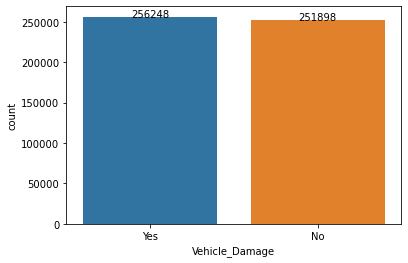

In [8]:
graph = sns.countplot(result_df.Vehicle_Damage)
graph.set_xticklabels(graph.get_xticklabels())
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        result_df['Vehicle_Damage'].value_counts()[i],ha="center")
    i += 1

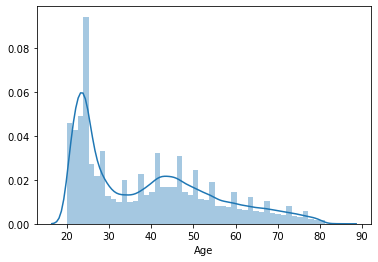

In [9]:
sns.distplot(result_df.Age)

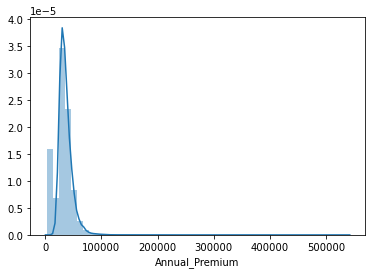

In [10]:
sns.distplot(result_df.Annual_Premium)

In [11]:
a=result_df.groupby(['Vehicle_Damage','Response']).size().sort_values(ascending=False).reset_index(name='Sum of Response')
b=result_df.groupby(['Previously_Insured','Response']).size().sort_values(ascending=False).reset_index(name='Sum of Response')
c=result_df.groupby(['Gender','Response']).size().sort_values(ascending=False).reset_index(name='Sum of Response')
print(a)
print(b)
print(c)

  Vehicle_Damage  Response  Sum of Response
0             No         0           250916
1            Yes         0           210520
2            Yes         1            45728
3             No         1              982
   Previously_Insured  Response  Sum of Response
0                   1         0           232912
1                   0         0           228524
2                   0         1            46552
3                   1         1              158
   Gender  Response  Sum of Response
0    Male         0           245800
1  Female         0           215636
2    Male         1            28525
3  Female         1            18185


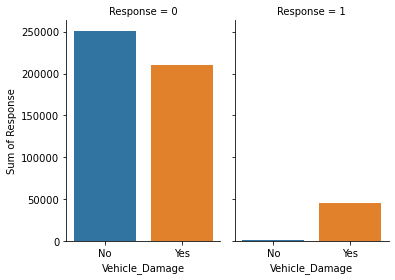

In [12]:
graph = sns.catplot(x="Vehicle_Damage", y="Sum of Response",col="Response",
                data=a, kind="bar",
                height=4, aspect=.7);


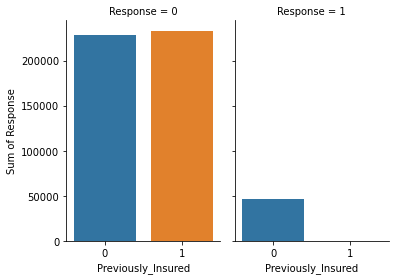

In [13]:
graph = sns.catplot(x="Previously_Insured", y="Sum of Response",col="Response",
                data=b, kind="bar",
                height=4, aspect=.7);

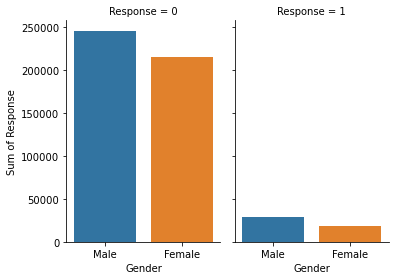

In [14]:
graph = sns.catplot(x="Gender", y="Sum of Response",col="Response",
                data=c, kind="bar",
                height=4, aspect=.7);

In [15]:
result_df.Vehicle_Age.unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [8]:
result_df.Gender[result_df.Gender == 'Male'] = 1
result_df.Gender[result_df.Gender == 'Female'] = 0

result_df.Vehicle_Damage[result_df.Vehicle_Damage == 'Yes'] = 1
result_df.Vehicle_Damage[result_df.Vehicle_Damage == 'No'] = 0

result_df['Gender'] = result_df['Gender'].astype(int)
result_df['Vehicle_Damage'] = result_df['Vehicle_Damage'].astype(int)

<ipython-input-8-8f978a608a47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df.Gender[result_df.Gender == 'Male'] = 1
<ipython-input-8-8f978a608a47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df.Gender[result_df.Gender == 'Female'] = 0
<ipython-input-8-8f978a608a47>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df.Vehicle_Damage[result_df.Vehicle_Damage == 'Yes'] = 1
<ipython-input-8-8f978a608a47>:5: S

In [17]:
result_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,> 2 Years,1,40454,26,217,1
1,2,1,76,1,3,0,1-2 Year,0,33536,26,183,0
2,3,1,47,1,28,0,> 2 Years,1,38294,26,27,1
3,4,1,21,1,11,1,< 1 Year,0,28619,152,203,0
4,5,0,29,1,41,1,< 1 Year,0,27496,152,39,0


In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
result_df['Vehicle_Age'] = labelencoder.fit_transform(result_df['Vehicle_Age'])

In [19]:
result_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,2,1,40454,26,217,1
1,2,1,76,1,3,0,0,0,33536,26,183,0
2,3,1,47,1,28,0,2,1,38294,26,27,1
3,4,1,21,1,11,1,1,0,28619,152,203,0
4,5,0,29,1,41,1,1,0,27496,152,39,0


In [20]:
numerical_columns=['Age', 'Region_Code','Annual_Premium','Vintage']
result_df[numerical_columns].describe()

,Age,Region_Code,Annual_Premium,Vintage
count,508146.000000,508146.000000,508146.000000,508146.000000
mean,38.808413,26.406572,30554.453041,154.340123
std,15.500179,13.224921,17146.574625,83.668793
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,15.000000,24381.000000,82.000000
50%,36.000000,28.000000,31661.000000,154.000000
75%,49.000000,35.000000,39403.750000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


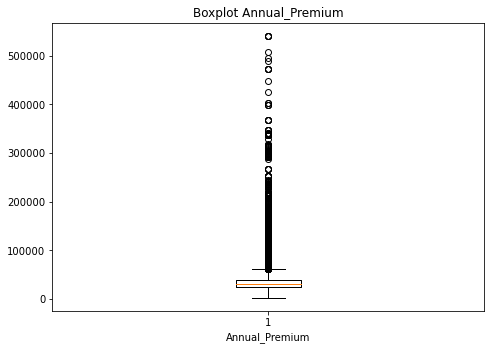

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
# Create the boxplot
bp = ax.boxplot(result_df['Annual_Premium'])
plt.xlabel("Annual_Premium")
plt.title("Boxplot Annual_Premium")
plt.show()

In [22]:
import numpy as np
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [23]:
outlier_datapoints = detect_outlier(result_df["Annual_Premium"])
print(outlier_datapoints)

[89282, 101021, 82705, 90789, 119735, 104002, 92716, 112974, 139130, 98002, 267698, 125643, 85786, 95217, 101064, 86283, 136061, 117799, 84142, 91520, 87273, 133098, 103026, 87831, 152331, 100688, 101069, 87954, 131469, 104529, 86336, 82081, 90024, 98428, 107966, 89687, 137771, 82470, 88368, 88577, 90967, 91670, 83846, 99793, 101048, 90046, 95554, 88825, 82932, 123745, 103372, 84943, 103758, 101716, 508073, 89480, 88129, 101904, 94900, 90526, 83368, 82085, 93104, 84472, 82144, 141770, 95569, 301762, 120037, 119148, 84077, 95258, 110204, 89463, 315565, 93104, 85772, 89902, 85670, 126671, 107748, 92211, 87105, 86793, 83912, 107266, 84056, 89637, 124345, 98425, 82879, 91565, 113820, 89355, 104781, 91407, 95895, 89888, 183718, 98526, 88378, 86983, 89884, 86606, 106578, 116045, 86416, 95598, 94647, 82422, 110973, 99324, 94506, 93656, 87578, 95221, 109361, 86885, 92190, 95817, 84122, 83433, 103906, 87763, 98337, 82876, 181076, 111257, 160380, 159869, 229935, 94109, 88281, 83137, 86646, 99999

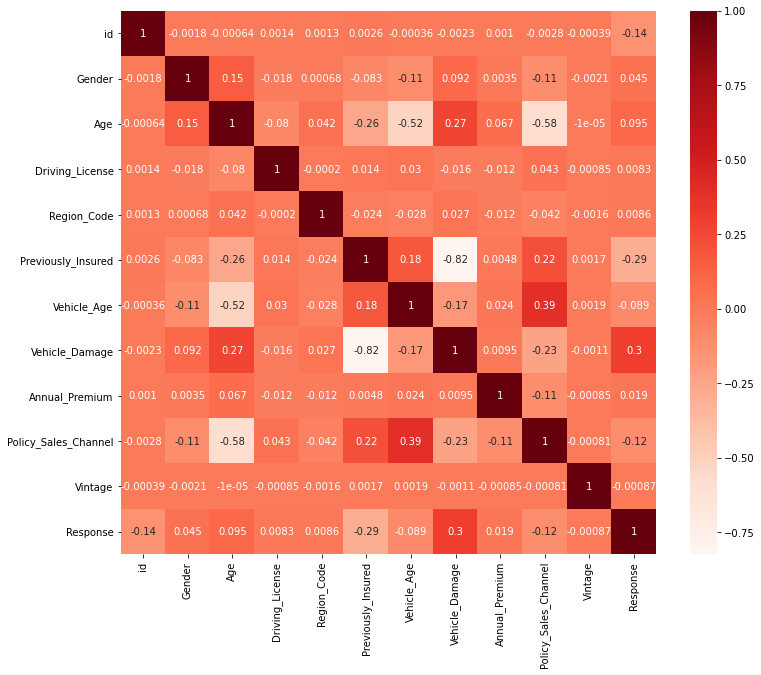

Correlation Coefficeint With Respect to Response
id                      0.001042
Gender                  0.003502
Age                     0.067392
Driving_License         0.012084
Region_Code             0.012012
Previously_Insured      0.004776
Vehicle_Age             0.023545
Vehicle_Damage          0.009504
Annual_Premium          1.000000
Policy_Sales_Channel    0.114035
Vintage                 0.000855
Response                0.019477
Name: Annual_Premium, dtype: float64


In [24]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = result_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
#Correlation with output variable
cor_target = abs(cor["Annual_Premium"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
print("Correlation Coefficeint With Respect to Response")
print(relevant_features)

# Linear Regression

In [25]:
x=result_df.drop(['Annual_Premium','id'], axis = 1)
y=result_df['Annual_Premium']
print(x.shape)
print(y.shape)

(508146, 10)
(508146,)


In [26]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [27]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (355702, 10)
Training Labels Shape: (355702,)
Testing Features Shape: (152444, 10)
Testing Labels Shape: (152444,)


In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_features, train_labels)
y_pred = model.predict(test_features)

In [29]:
print("Training set score: {:.4f}".format(model.score(train_features,train_labels)))

print("Test set score: {:.4f}".format(model.score(test_features,test_labels)))

Training set score: 0.0216
Test set score: 0.0202


In [30]:
print(model.coef_)
print(model.intercept_)

[-2.20296565e+02  5.68341300e+01 -2.40386630e+03 -2.20994504e+01
  1.84695901e+03  2.87446966e+03  7.89872640e+02 -4.05438669e+01
 -2.30672795e-01  9.38180788e+02]
33231.52629203656


In [31]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_labels, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 16885.9328


In [32]:
# Calculate and print r2_score

from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(test_labels, y_pred)))

R2 Score value: 0.0202


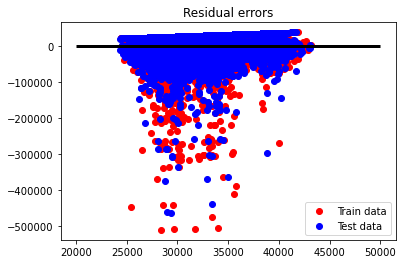

In [33]:
# Plotting residual errors
plt.scatter(model.predict(train_features), model.predict(train_features) - train_labels, color = 'red', label = 'Train data')
plt.scatter(model.predict(test_features), model.predict(test_features) - test_labels, color = 'blue', label = 'Test data')
plt.hlines(xmin = 20000, xmax = 50000, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show()

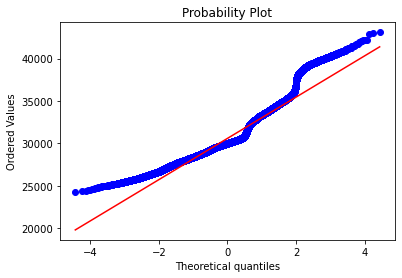

In [34]:
import statsmodels.api as sm
import pylab
import scipy.stats as stats
stats.probplot(y_pred.reshape(-1), dist="norm", plot=pylab)
pylab.show()

Text(0.5, 1.0, 'Residual vs Fitted')

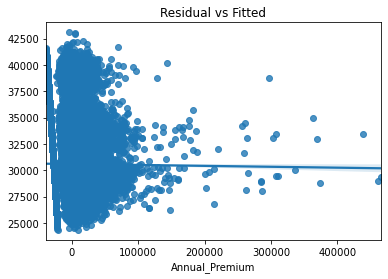

In [35]:
import seaborn as sns
residuals = test_labels - y_pred
ax = sns.regplot(x=residuals, y=y_pred)
ax.set_title('Residual vs Fitted')

# Lasso, Ridge 

In [36]:
from sklearn.linear_model import Lasso

In [37]:
lasso = Lasso()
lasso.fit(train_features,train_labels)
train_score=lasso.score(train_features,train_labels)
test_score=lasso.score(test_features,test_labels)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(train_features,train_labels)
train_score001=lasso001.score(train_features,train_labels)
test_score001=lasso001.score(test_features,test_labels)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("training score for alpha=0.01:", train_score001) 
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(train_features,train_labels)
train_score00001=lasso00001.score(train_features,train_labels)
test_score00001=lasso00001.score(test_features,test_labels)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("training score for alpha=0.0001:", train_score00001) 
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)

training score: 0.021558759070389066
test score:  0.020205815285361806
number of features used:  10
training score for alpha=0.01: 0.02156062130858072
test score for alpha =0.01:  0.02020252115769039
number of features used: for alpha =0.01: 10
training score for alpha=0.0001: 0.02156062149479465
test score for alpha =0.0001:  0.020202470244255255
number of features used: for alpha =0.0001: 10


In [38]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(train_features, train_labels)
y_pred = ridgereg.predict(test_features)
from sklearn import metrics
print("R-Square Value",r2_score(test_labels,y_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(test_labels, y_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(test_labels, y_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(test_labels, y_pred)))
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(train_features, train_labels)
y_pred = ridgereg.predict(test_features)
print("R-Square Value",r2_score(test_labels,y_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(test_labels, y_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(test_labels, y_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(test_labels, y_pred)))
print(ridgereg.coef_)

R-Square Value 0.02020246972837836
mean_absolute_error : 11950.144186561989
mean_squared_error :  285134727.5654296
root_mean_squared_error :  16885.932830774545
R-Square Value 0.020080346450857656
mean_absolute_error : 11939.191499945779
mean_squared_error :  285170267.1400758
root_mean_squared_error :  16886.985140636436
[-1.83744566e+02  5.12760030e+01 -2.35563745e+03 -1.96128702e+01
  1.30913268e+03  2.40050122e+03  3.91052677e+02 -3.56696578e+01
 -2.03058346e-01  8.41517289e+02]


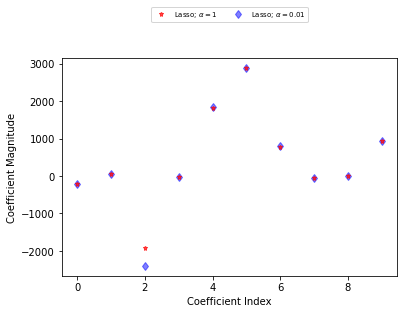

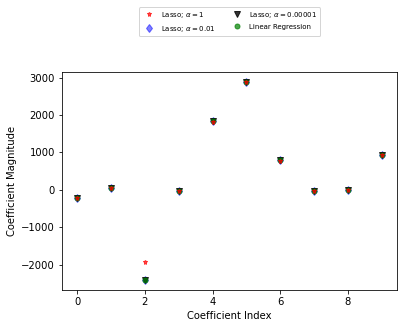

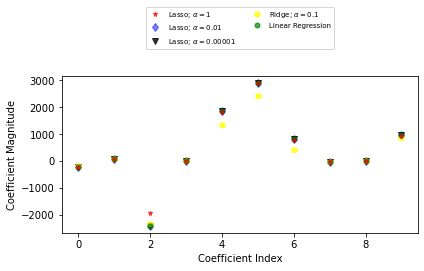

In [39]:
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) 
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(fontsize=7,loc="lower center", bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.show()

plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) 
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$')
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') 
plt.plot(model.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(fontsize=7,loc="lower center", bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.show()

plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) 
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$')
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') 
plt.plot(ridgereg.coef_,alpha=0.8,linestyle='none',marker='p',markersize=6,color='yellow',label=r'Ridge; $\alpha = 0.1$') 
plt.plot(model.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(fontsize=7,loc="lower center", bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.tight_layout()
plt.show()

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
x=result_df.drop('Response', axis = 1)
y=result_df['Response']

In [36]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [37]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()
train_features, train_labels = nr.fit_resample(train_features, train_labels)

In [38]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (65378, 11)
Training Labels Shape: (65378,)
Testing Features Shape: (152444, 11)
Testing Labels Shape: (152444,)


In [39]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)

logreg.fit(train_features, train_labels)

y_pred=logreg.predict(test_features)

print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.30      0.46    138423
           1       0.11      0.82      0.19     14021

    accuracy                           0.35    152444
   macro avg       0.53      0.56      0.32    152444
weighted avg       0.87      0.35      0.43    152444



In [40]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred)*100)

Accuracy: 35.086982760882684


In [41]:
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))
print("Precision:",metrics.precision_score(test_labels, y_pred))
print("Recall:",metrics.recall_score(test_labels, y_pred))

Accuracy: 0.35086982760882685
Precision: 0.1067787664700599
Recall: 0.8224805648669853


In [42]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_labels, y_pred)
cnf_matrix

array([[41956, 96467],
       [ 2489, 11532]], dtype=int64)

In [43]:
import numpy as np
predictions = logreg.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.65 degrees.


In [44]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=8)
fit = rfe.fit(train_features, train_labels)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print("Features:", train_features.columns)

Num Features: 8
Selected Features: [False  True  True  True  True  True  True  True False  True False]
Feature Ranking: [4 1 1 1 1 1 1 1 3 1 2]
Features: Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')


In [45]:
logreg_imp = LogisticRegression(max_iter=1000)
train_important = train_features.drop(['id','Annual_Premium','Vintage'], axis=1)
test_important = test_features.drop(['id','Annual_Premium','Vintage'], axis=1)
logreg_imp.fit(train_important, train_labels)
predictions = logreg_imp.predict(test_important)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print(classification_report(test_labels, predictions))

Mean Absolute Error: 0.38 degrees.
              precision    recall  f1-score   support

           0       0.99      0.58      0.73    138423
           1       0.19      0.97      0.32     14021

    accuracy                           0.62    152444
   macro avg       0.59      0.77      0.52    152444
weighted avg       0.92      0.62      0.69    152444



In [46]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_labels, predictions)
cnf_matrix

array([[80271, 58152],
       [  488, 13533]], dtype=int64)

In [47]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_labels, predictions)*100)

Accuracy: 61.53341554931647


In [48]:
print("Accuracy:",metrics.accuracy_score(test_labels, predictions))
print("Precision:",metrics.precision_score(test_labels, predictions))
print("Recall:",metrics.recall_score(test_labels, predictions))

Accuracy: 0.6153341554931647
Precision: 0.1887842644904792
Recall: 0.9651950645460381


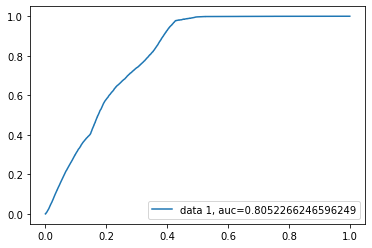

In [49]:
y_pred_proba = logreg_imp.predict_proba(test_important)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_labels,  y_pred_proba)
auc = metrics.roc_auc_score(test_labels, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Assignment 3

# Decision Tree

In [56]:
import timeit
start = timeit.default_timer()
x=result_df.drop('Response', axis = 1)
y=result_df['Response']
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()    
dt.fit(train_features, train_labels)
dt_pred = dt.predict(test_features)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  2.209480400000004


In [59]:
param_dict = {
    "criterion" : ['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)   
}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dt,param_grid = param_dict,cv=10,verbose=1,n_jobs=-1)
grid.fit(train_features,train_labels)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 634 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 984 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1984 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2634 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 3384 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 4234 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 5184 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 6234 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 22.2min finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [60]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 7}

In [61]:
start = timeit.default_timer()
dt = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3, min_samples_split=7)    
dt.fit(train_features, train_labels)
dt_pred = dt.predict(test_features)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  1.1883704000001671


In [62]:
errors = abs(dt_pred - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print("Accuracy:",metrics.accuracy_score(test_labels, dt_pred)*100)
conf = confusion_matrix(test_labels,dt_pred)
print(conf)

Mean Absolute Error: 0.09 degrees.
Accuracy: 90.79596441972134
[[138412     11]
 [ 14020      1]]


In [63]:
print("Accuracy:",metrics.accuracy_score(test_labels, dt_pred))
print("Precision:",metrics.precision_score(test_labels, dt_pred))
print("Recall:",metrics.recall_score(test_labels, dt_pred))

Accuracy: 0.9079596441972134
Precision: 0.08333333333333333
Recall: 7.132158904500393e-05


In [64]:
importances = list(dt.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True) 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Previously_Insured   Importance: 0.55
Variable: id                   Importance: 0.28
Variable: Age                  Importance: 0.07
Variable: Vehicle_Damage       Importance: 0.07
Variable: Policy_Sales_Channel Importance: 0.02
Variable: Gender               Importance: 0.0
Variable: Driving_License      Importance: 0.0
Variable: Region_Code          Importance: 0.0
Variable: Vehicle_Age          Importance: 0.0
Variable: Annual_Premium       Importance: 0.0
Variable: Vintage              Importance: 0.0


In [66]:
rf_most_important = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3, min_samples_split=7)
train_important = train_features.loc[:, ['Annual_Premium','Vintage','Age','Region_Code','Vehicle_Damage','Policy_Sales_Channel','Gender','Previously_Insured']]
test_important = test_features.loc[:, ['Annual_Premium','Vintage','Age','Region_Code','Vehicle_Damage','Policy_Sales_Channel','Gender','Previously_Insured']]
rf_most_important.fit(train_important, train_labels)
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.09 degrees.


In [67]:
print("Accuracy:",metrics.accuracy_score(test_labels, predictions))
print("Precision:",metrics.precision_score(test_labels, predictions))
print("Recall:",metrics.recall_score(test_labels, predictions))

Accuracy: 0.9079137256959933
Precision: 0.13043478260869565
Recall: 0.00021396476713501176


0.8859370741341136


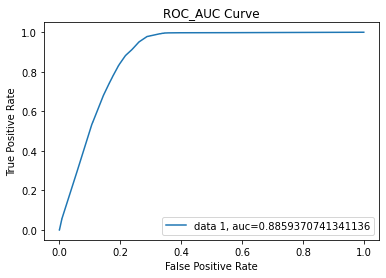

In [68]:
y_pred_proba = dt.predict_proba(test_features)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_labels,  y_pred_proba)
auc = metrics.roc_auc_score(test_labels, y_pred_proba)
print(auc)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC_AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Random Forest

In [50]:
import timeit
start = timeit.default_timer()
x=result_df.drop('Response', axis = 1)
y=result_df['Response']
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state=42)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)
stop = timeit.default_timer()
print('Time: ', stop - start)  

Time:  1021.1808909000006


In [52]:
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print("Accuracy:",metrics.accuracy_score(test_labels, predictions))
print("Precision:",metrics.precision_score(test_labels, predictions))
print("Recall:",metrics.recall_score(test_labels, predictions))
conf = confusion_matrix(test_labels,predictions)
print(conf)

Mean Absolute Error: 0.1 degrees.
Accuracy: 0.9047781480412479
Precision: 0.39983812221772563
Recall: 0.07046572997646387
[[136940   1483]
 [ 13033    988]]


In [53]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True) 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: id                   Importance: 0.26
Variable: Vintage              Importance: 0.19
Variable: Annual_Premium       Importance: 0.17
Variable: Age                  Importance: 0.12
Variable: Region_Code          Importance: 0.08
Variable: Vehicle_Damage       Importance: 0.06
Variable: Policy_Sales_Channel Importance: 0.05
Variable: Previously_Insured   Importance: 0.04
Variable: Gender               Importance: 0.01
Variable: Vehicle_Age          Importance: 0.01
Variable: Driving_License      Importance: 0.0


In [54]:
print("Accuracy:",metrics.accuracy_score(test_labels, predictions))
print("Precision:",metrics.precision_score(test_labels, predictions))
print("Recall:",metrics.recall_score(test_labels, predictions))

Accuracy: 0.9047781480412479
Precision: 0.39983812221772563
Recall: 0.07046572997646387


0.8871391801108104


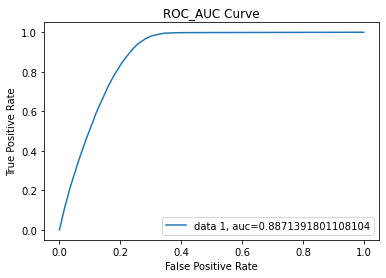

In [55]:
y_pred_proba = rf.predict_proba(test_features)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_labels,  y_pred_proba)
auc = metrics.roc_auc_score(test_labels, y_pred_proba)
print(auc)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC_AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# GBM

In [87]:
import timeit
start = timeit.default_timer() 
x=result_df.drop('Response', axis = 1)
y=result_df['Response']
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(x, y, test_size = 0.3, random_state = 0)
from imblearn.over_sampling import SMOTE
nr = SMOTE()
train_features, train_labels = nr.fit_sample(train_features, train_labels)

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(train_features,train_labels)
predictions = gbm.predict(test_features)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  97.52382639999996


In [ ]:
param ={
        "learning_rate" : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
        "n_estimators" : [100, 200]}

grid_search = GridSearchCV(estimator = gbm, param_grid = param, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(train_features, train_labels)
grid_search.best_params_

In [90]:
start = timeit.default_timer() 
gbm = GradientBoostingClassifier(learning_rate=0.5, n_estimators=200)
gbm.fit(train_features,train_labels)
predictions = gbm.predict(test_features)
stop = timeit.default_timer()
print('Time: ', stop - start)

In [91]:
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print("Accuracy:",metrics.accuracy_score(test_labels, predictions))
print("Precision:",metrics.precision_score(test_labels, predictions))
print("Recall:",metrics.recall_score(test_labels, predictions))
conf = confusion_matrix(test_labels,predictions)
print(conf)

Mean Absolute Error: 0.15 degrees.
Accuracy: 0.8491577234919052
Precision: 0.31757196292080014
Recall: 0.5570929320305257
[[121638  16785]
 [  6210   7811]]


0.8787520166969816


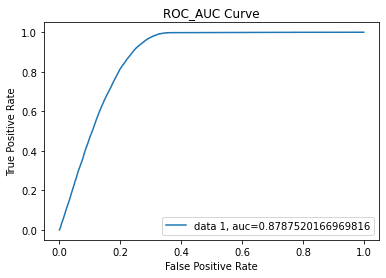

In [92]:
y_pred_proba = gbm.predict_proba(test_features)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_labels,  y_pred_proba)
auc = metrics.roc_auc_score(test_labels, y_pred_proba)
print(auc)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC_AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# XGM

In [75]:
import timeit
start = timeit.default_timer()  
x=result_df.drop('Response', axis = 1)
y=result_df['Response']
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(x, y, test_size = 0.3, random_state = 0)
from imblearn.over_sampling import SMOTE
nr = SMOTE()
train_features, train_labels = nr.fit_sample(train_features, train_labels)

In [84]:
from xgboost import XGBClassifier as xgb
model_xgb = xgb()
model_xgb.fit(train_features,train_labels)
best_preds = model_xgb.predict(test_features)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  3162.954396


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15]}

grid = GridSearchCV(model_xgb,
                    parameters, n_jobs=-1,
                    scoring="neg_log_loss",
                    cv=3, verbose=2)
grid.fit(train_features, train_labels)
grid.best_params_

In [ ]:
start = timeit.default_timer() 
model_xgb = xgb(eta=0.05, max_depth=12)
model_xgb.fit(train_features,train_labels)
best_preds = model_xgb.predict(test_features)
stop = timeit.default_timer()
print('Time: ', stop - start)

In [85]:
errors = abs(best_preds - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print("Accuracy:",metrics.accuracy_score(test_labels, best_preds))
print("Precision:",metrics.precision_score(test_labels, best_preds))
print("Recall:",metrics.recall_score(test_labels, best_preds))
conf = confusion_matrix(test_labels,best_preds)
print(conf)

Mean Absolute Error: 0.15 degrees.
Accuracy: 0.8471897877253286
Precision: 0.3198943525207799
Recall: 0.5874046073746523
[[120913  17510]
 [  5785   8236]]


0.8813100371610658


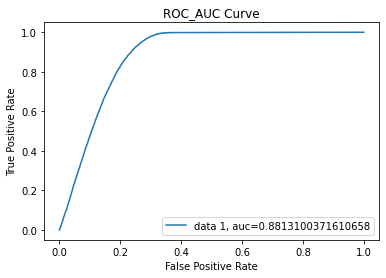

In [86]:
y_pred_proba = model_xgb.predict_proba(test_features)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_labels,  y_pred_proba)
auc = metrics.roc_auc_score(test_labels, y_pred_proba)
print(auc)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC_AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Neural Network Classifier

In [1]:
from keras import Sequential
from keras.layers import Dense

In [28]:
x=result_df.drop('Response', axis = 1)
y=result_df['Response']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [29]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
train_features, test_features, train_labels, test_labels = train_test_split(x, y, test_size = 0.3)
nr = SMOTE()
train_features, train_labels = nr.fit_sample(train_features, train_labels)

In [12]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (645800, 11)
Training Labels Shape: (645800,)
Testing Features Shape: (152444, 11)
Testing Labels Shape: (152444,)


In [13]:
def build_model():    
    classifier = Sequential()
    classifier.add(Dense(6, activation='relu', kernel_initializer='random_normal', input_dim=11))
    classifier.add(Dense(6, activation='relu', kernel_initializer='random_normal'))
    classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
    classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
    return classifier

In [14]:
keras_model = build_model()
keras_model.fit(train_features,train_labels, batch_size=64, epochs=100)

Epoch 1/100
10091/10091 [==============================] - 16s 2ms/step - loss: 0.3795 - accuracy: 0.8377
Epoch 2/100
10091/10091 [==============================] - 16s 2ms/step - loss: 0.3604 - accuracy: 0.8446
Epoch 3/100
10091/10091 [==============================] - 16s 2ms/step - loss: 0.3580 - accuracy: 0.8448
Epoch 4/100
10091/10091 [==============================] - 16s 2ms/step - loss: 0.3566 - accuracy: 0.8451
Epoch 5/100
10091/10091 [==============================] - 16s 2ms/step - loss: 0.3554 - accuracy: 0.8454
Epoch 6/100
10091/10091 [==============================] - 16s 2ms/step - loss: 0.3547 - accuracy: 0.8454
Epoch 7/100
10091/10091 [==============================] - 16s 2ms/step - loss: 0.3543 - accuracy: 0.8453
Epoch 8/100
10091/10091 [==============================] - 16s 2ms/step - loss: 0.3540 - accuracy: 0.8453
Epoch 9/100
10091/10091 [==============================] - 16s 2ms/step - loss: 0.3540 - accuracy: 0.8453
Epoch 10/100
10091/10091 [====================

10091/10091 [==============================] - 17s 2ms/step - loss: 0.3500 - accuracy: 0.8473
Epoch 78/100
10091/10091 [==============================] - 17s 2ms/step - loss: 0.3501 - accuracy: 0.8473
Epoch 79/100
10091/10091 [==============================] - 17s 2ms/step - loss: 0.3501 - accuracy: 0.8472
Epoch 80/100
10091/10091 [==============================] - 17s 2ms/step - loss: 0.3501 - accuracy: 0.8474
Epoch 81/100
10091/10091 [==============================] - 17s 2ms/step - loss: 0.3500 - accuracy: 0.8473
Epoch 82/100
10091/10091 [==============================] - 17s 2ms/step - loss: 0.3500 - accuracy: 0.8474
Epoch 83/100
10091/10091 [==============================] - 17s 2ms/step - loss: 0.3501 - accuracy: 0.8474
Epoch 84/100
10091/10091 [==============================] - 17s 2ms/step - loss: 0.3500 - accuracy: 0.8474
Epoch 85/100
10091/10091 [==============================] - 17s 2ms/step - loss: 0.3500 - accuracy: 0.8472
Epoch 86/100
10091/10091 [========================

In [30]:
eval_model=keras_model.evaluate(train_features, train_labels)
eval_model

20176/20176 [==============================] - 40s 2ms/step - loss: 0.3513 - accuracy: 0.8465


[0.35126250982284546, 0.8464527726173401]

In [31]:
y_pred=keras_model.predict(test_features)
y_pred =(y_pred>0.5)

In [32]:
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))
print("Precision:",metrics.precision_score(test_labels, y_pred))
print("Recall:",metrics.recall_score(test_labels, y_pred))
cm = confusion_matrix(test_labels, y_pred)
print(cm)

Accuracy: 0.7590918632415838
Precision: 0.26553637610827857
Recall: 0.9380787037037037
[[102751  35869]
 [   856  12968]]


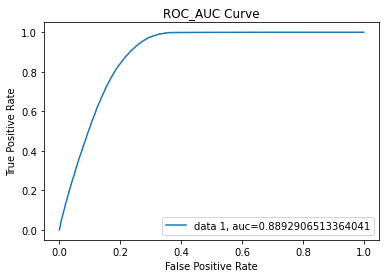

In [33]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
y_pred_keras = keras_model.predict(test_features).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_labels, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot(fpr_keras,tpr_keras,label="data 1, auc="+str(auc_keras))
plt.legend(loc=4)
plt.title("ROC_AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()